<a href="https://colab.research.google.com/github/dynji/Computer-Vision/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data_Preprocesssing (Tiền xử lý dữ liệu)

**Data overview**

In [ ]:
import numpy as np #thu vien cho phep lam viec hieu qua voi ma tran va mang
import matplotlib.pyplot as plt #thu vien giup ve cac diem du lieu truc quan hoa, de nhin
import pandas as pd #thu vien ma nguon mo duoc xay dung tren numpy, ho tro doc va phan tich du lieu duoi dang bang
import seaborn as sns #thu vien giup truc quan hoa du lieu, ve hinh tot hon

bank_full_df = pd.read_csv('/content/drive/MyDrive/AI report/bank-full.csv', encoding = "Latin-1") #doc du lieu tu file
bank_full_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
bank_full_df.y.value_counts() #xuat ra so loai gia tri cua y: bao nhieu no, bao nhieu yes

no     39922
yes     5289
Name: y, dtype: int64

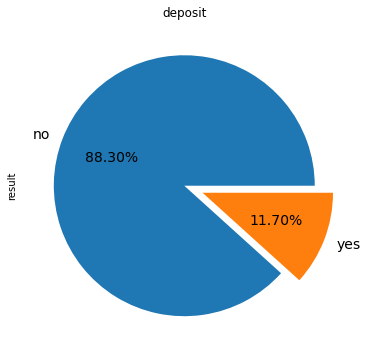

In [ ]:
data = bank_full_df.y.value_counts() #ve hien thi gia tri cua y
data.plot.pie(figsize=(10,6), ylabel='result', fontsize = 14, autopct='%1.2f%%', title = 'deposit', explode=[0,0.15])







*the class label is highly imbalance, over will balance it by undersampling*

In [ ]:
from sklearn.utils import shuffle

In [ ]:
#from doman specific knowledge, we balance data by taking 11162 examples and keep all the 'yes' class label
bank_yes = bank_full_df.loc[bank_full_df.y == 'yes']
bank_no = bank_full_df.loc[bank_full_df.y == 'no'].sample(n = 11162 - 5289, random_state = 42) #random_strate=const de khi random se ra ket qua giong nhau o moi lan chay, ung voi moi const se ra mot ket qua
new_df = shuffle(pd.concat([bank_yes, bank_no]), random_state = 42).reset_index(drop = 1)
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,blue-collar,married,secondary,no,5164,no,no,cellular,21,nov,253,1,-1,0,unknown,no
1,56,management,married,primary,no,870,no,no,cellular,14,may,220,1,179,1,success,yes
2,28,student,single,tertiary,no,844,no,no,cellular,16,apr,551,2,-1,0,unknown,yes
3,27,blue-collar,single,secondary,no,535,no,no,cellular,16,aug,265,3,95,4,success,yes
4,59,retired,married,primary,no,4007,no,no,cellular,26,mar,157,2,116,4,failure,no


In [ ]:
Spam_yes = df.loc[df.Spam == '1']
Spam_no = df.loc[df.Spam == '0'].sample(n = 11162 - 5289, random_state = 42) #random_strate=const de khi random se ra ket qua giong nhau o moi lan chay, ung voi moi const se ra mot ket qua
new_df = shuffle(pd.concat([Spam_yes, Spam_no]), random_state = 42).reset_index(drop = 1)
new_df.head()

In [ ]:
new_df.y.value_counts()

no     5873
yes    5289
Name: y, dtype: int64

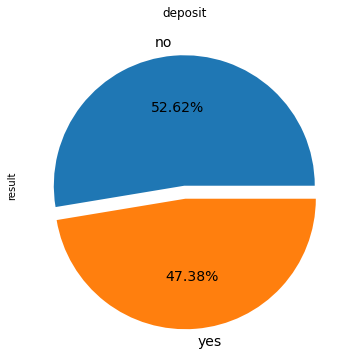

In [ ]:
data = new_df.y.value_counts()
data.plot.pie(figsize=(10,6), ylabel = 'result', fontsize = 14, autopct = '%1.2f%%', title = 'deposit', explode = [0, 0.1])

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  y          11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


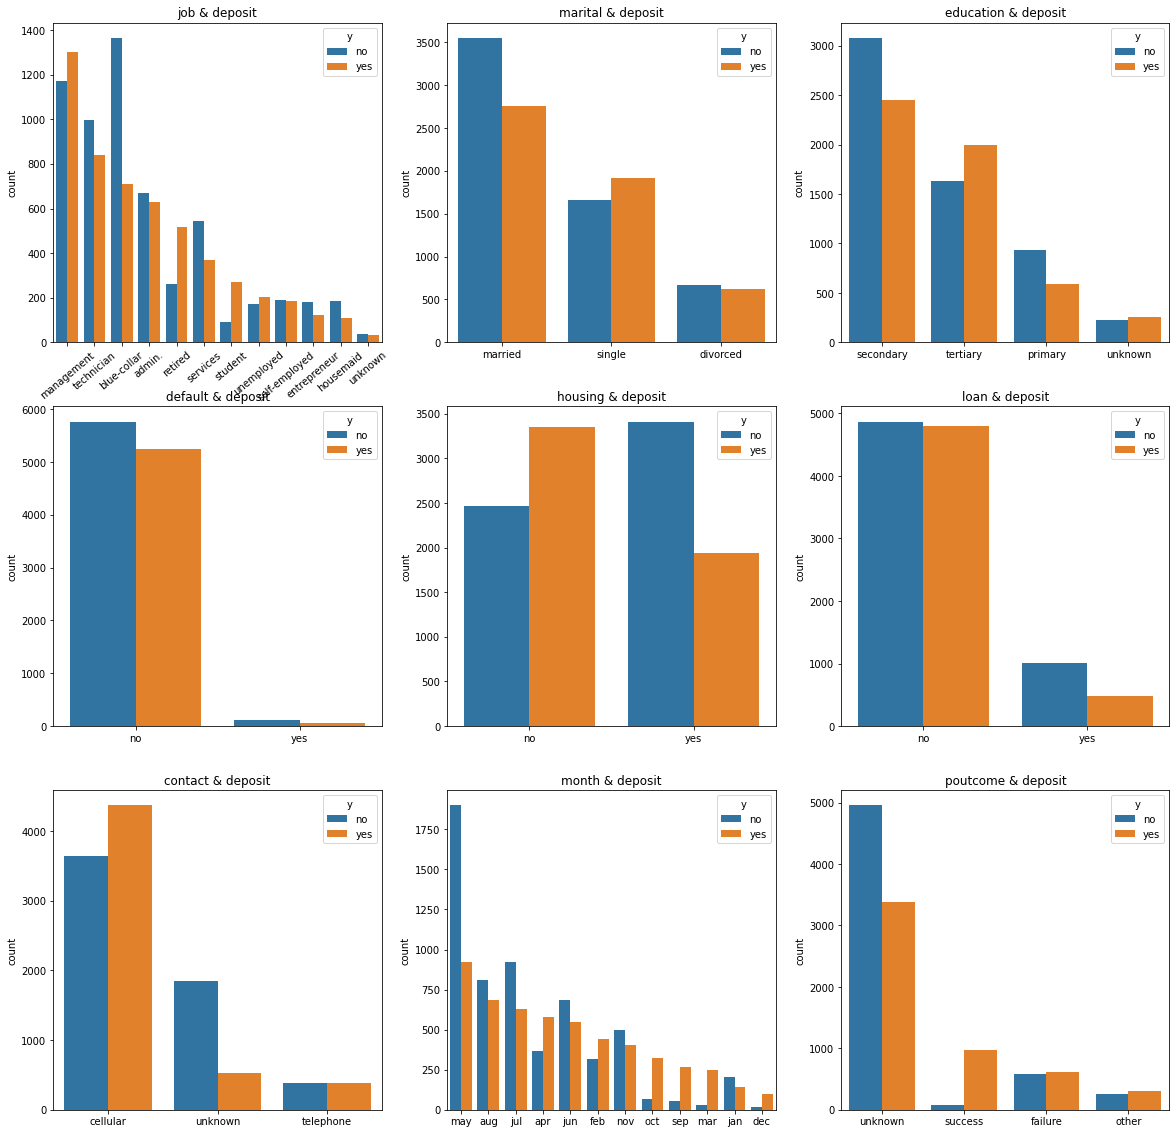

In [ ]:
#truc quan hoa anh huong moi thuoc tinh den lua chon
# categorical attributes
categories = ['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
fig, ax = plt.subplots(figsize = (20,20), ncols=3, nrows = 3)
count = 0
for col in categories:
    g=sns.countplot(x = col, data = new_df, hue = 'y', order = bank_yes[col].value_counts().index, ax = ax[count//3, count%3])
    g.set_title(col+' & deposit')
    g.set_xlabel(None,fontsize = 9)
    if col == 'job':
        plt.setp(g.get_xticklabels(), rotation=40)
    count+=1



```
# attributes: categorical and numerical overview
```





```
> here we see job, education, contact and poutcome have unknown/missing values
> with job, education, contact we impute missing values by apply most-frequent strategy
> with poutcome since unknown values appears more than 80%, we consider dropping it
> other categorical attribute will be convert into numerical by number 1, 2, 3, ... *văn bản in nghiêng*
```



count          11162
unique            12
top       management
freq            2474
Name: job, dtype: object 

count       11162
unique          3
top       married
freq         6305
Name: marital, dtype: object 

count         11162
unique            4
top       secondary
freq           5530
Name: education, dtype: object 

count     11162
unique        2
top          no
freq      11003
Name: default, dtype: object 

count     11162
unique        2
top          no
freq       5815
Name: housing, dtype: object 

count     11162
unique        2
top          no
freq       9675
Name: loan, dtype: object 

count        11162
unique           3
top       cellular
freq          8015
Name: contact, dtype: object 

count     11162
unique       12
top         may
freq       2825
Name: month, dtype: object 

count       11162
unique          4
top       unknown
freq         8342
Name: poutcome, dtype: object 



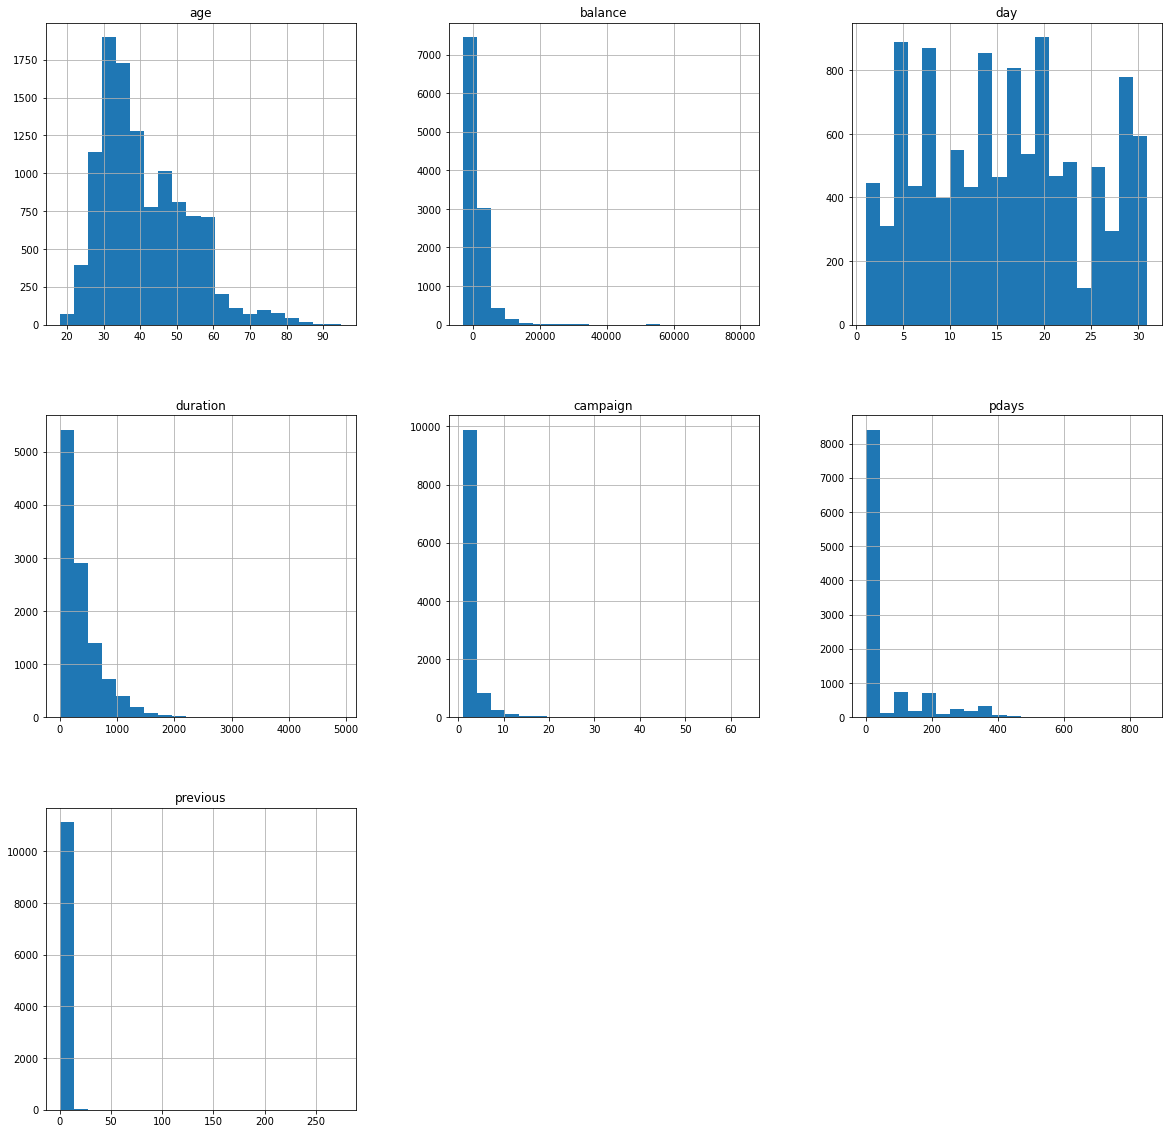

In [ ]:
# numerical attributes
numerical = ['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
#col = {}
for col in numerical:
    print(new_df[col].describe(),"\n")
new_df.drop(columns='y').hist(bins = 20, figsize=(20,20))
plt.show()

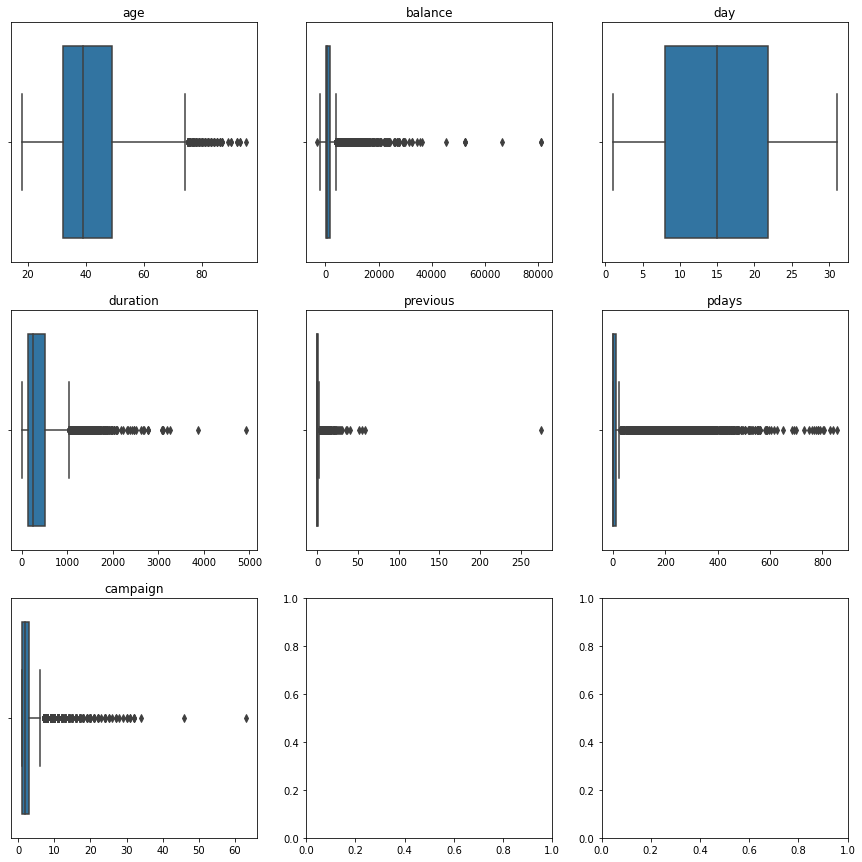

In [ ]:
#su phan bo cua data /boxplot
fig, ax = plt.subplots(figsize = (15,15), ncols=3, nrows = 3)
count =0
for col in ['age', 'balance', 'day', 'duration', 'previous', 'pdays', 'campaign']:
    if count < 7:
        g=sns.boxplot(x = col, data = new_df, ax = ax[count//3, count%3])
        g.set_title(col)
        g.set_xlabel(None,fontsize = 9)
        count+=1

In [ ]:
numerical = ['age', 'balance', 'day', 'duration', 'previous', 'pdays', 'campaign']
outlier = {}
for col in numerical:
    outlier[col] = []
    data = new_df[col].to_numpy()
    mean = new_df[col].mean()
    std = new_df[col].std()
    count_ouliers = 0
    for i in range(len(data)):
        z = (data[i]-mean)/std
        if z >3 or z<-3:
            count_ouliers+=1
            outlier[col].append(i)
    print(col+': ', count_ouliers)
outlier_age = outlier['age']
outlier_balance = outlier['balance']
outlier_duration = outlier['duration']
outlier_previous = outlier['previous']
outlier_campaign = outlier['campaign']
a=list(set(outlier_balance+outlier_campaign+outlier_previous+outlier_age+outlier_duration))
len(a)

age:  126
balance:  183
day:  0
duration:  197
previous:  68
pdays:  178
campaign:  214


762

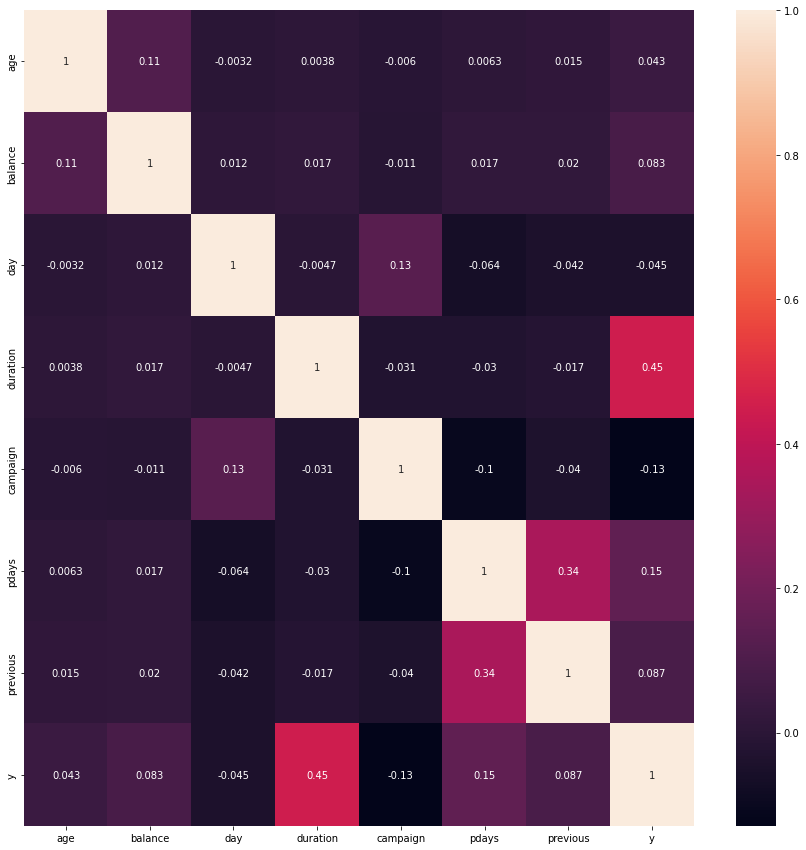

In [ ]:
def tran_y(x):
    if x == 'yes':
        return 1
    if x == 'no':
        return 0
    else:
        return x
#correlation matrix: xet tinh tuong quan giua 2 thuoc tinh
new_df.y = new_df.y.apply(tran_y)
plt.subplots(figsize = (15,15))
sns.heatmap(data = new_df.corr(), annot=True)



```
>pdays and poutcome do not correlate to the outcome much so we can drop those attributes
```



**imputing missing values**

In [ ]:
from sklearn.impute import SimpleImputer
imputer_mode = SimpleImputer(missing_values= 'unknown', strategy= 'most_frequent')

**categorical data transformation**

In [ ]:
def tran_job(x):
  if x == 'housemaid':
    return 1
  if x == 'entrepreneur':
    return 2
  if x == 'self-employed':
    return 3
  if x == 'unemployed':
    return 4
  if x == 'student':
    return 5
  if x == 'services':
    return 6
  if x == 'retired':
    return 7
  if x == 'admin.':
    return 8
  if x == 'blue-collar':
    return 9
  if x == 'technician':
    return 10
  if x == 'management':
    return 11
  else:
    return x
def tran_marital(x):
  if x == 'married':
    return 3
  if x == 'single':
    return 2
  if x == 'divorced':
    return 1
  else:
    return x
def tran_education(x):
  if x == 'secondary':
    return 3
  if x == 'tertiary':
    return 2
  if x == 'primary':
    return 1
  else:
    return x
def tran_binary_no(x):
  if x == 'no':
    return 1
  if x =='yes':
    return 0
  else:
    return x
def tran_contact(x):
    if x == 'cellular':
        return 1
    if x == 'telephone':
        return 0
    else:
        return x
def tran_month(x):
    if x == 'dec':
        return 1
    if x == 'jan':
        return 2
    if x == 'mar':
        return 3
    if x == 'sep':
        return 4
    if x == 'oct':
        return 5
    if x == 'nov':
        return 6
    if x == 'feb':
        return 7
    if x == 'jun':
        return 8
    if x == 'apr':
        return 9
    if x == 'jul':
        return 10
    if x == 'aug':
        return 11
    if x == 'may':
        return 12
def tran_y(x):
    if x == 'yes':
        return 1
    if x == 'no':
        return 0
    else:
        return x

**group age, duration and remove outliers from balance, campaign, previous**

In [ ]:
def duration_group( x):
    if x <= 102:
        return 1
    elif x<= 180:
        return 2
    elif x <= 319:
        return 3
    elif x<= 644.5:
        return 4
    else:
        return 5
def age_group(x):
    if x <= 32:
        return 1
    elif x <= 47:
        return 2
    elif x <= 70:
        return 3
    else:
        return 4
def remove_outliers(data):
    new = data.copy()
    numerical = ['balance', 'previous', 'campaign', 'age', 'duration']
    outlier = {}
    for col in numerical:
        outlier[col] = []
        data = new_df[col].to_numpy()
        mean = new_df[col].mean()
        std = new_df[col].std()
        count_ouliers = 0
        for i in range(len(data)):
            z = (data[i]-mean)/std
            if z >3 or z<-3:
                count_ouliers+=1
                outlier[col].append(i)
    o = list(set(outlier['balance']+outlier['previous']+outlier['campaign']+outlier['age'] + outlier['duration']))
    new.drop(new.index[o], inplace = True) #bo ca hang
    return new


**transform the dataset and normalize data**

In [ ]:
from sklearn.preprocessing import StandardScaler
def preprocessing(dataframe):
    copy_df = dataframe.copy()
    columns = copy_df.columns
    imputer_mode = SimpleImputer(missing_values= 'unknown', strategy= 'most_frequent')
    copy_df = imputer_mode.fit_transform(copy_df)
    copy_df = pd.DataFrame(copy_df, columns = columns)
    copy_df.job = copy_df.job.apply(tran_job)
    copy_df.marital = copy_df.marital.apply(tran_marital)
    copy_df.education = copy_df.education.apply(tran_education)
    copy_df.default = copy_df.default.apply(tran_binary_no)
    copy_df.housing = copy_df.housing.apply(tran_binary_no)
    copy_df.loan = copy_df.loan.apply(tran_binary_no)
    copy_df.contact = copy_df.contact.apply(tran_contact)
    copy_df.month = copy_df.month.apply(tran_month)
    copy_df = copy_df.drop(columns = ['poutcome', 'pdays'])
    copy_df.age = copy_df.age.apply(age_group)
    copy_df.duration = copy_df.duration.apply(duration_group)
    copy_df.y = copy_df.y.apply(tran_y)
    copy_df = remove_outliers(copy_df).reset_index(drop = 1)

    feature = []
    for i in columns:
        if i not in ['y', 'poutcome', 'pdays']:
            feature.append(i)
    scaler = StandardScaler()
    X = scaler.fit_transform(copy_df.drop(columns = 'y'))
    y = copy_df.y
    X = pd.DataFrame(X, columns = feature);
    copy_df = pd.concat([X, y], axis= 1)

    return copy_df

In [ ]:
input_df = preprocessing(new_df)
input_df.to_csv(r'encoded_data.csv', index = False, header=True)
input_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,-1.311437,0.290607,0.797595,0.826194,0.123001,2.150921,0.96392,0.393102,0.255861,0.665539,-1.025291,-0.033253,-0.738756,-0.435979,0
1,1.303893,1.034836,0.797595,-1.984540,0.123001,-0.197078,0.96392,0.393102,0.255861,-0.168820,1.045869,-0.033253,-0.738756,0.162119,1
2,-1.311437,-1.197850,-0.653593,-0.579173,0.123001,-0.211295,0.96392,0.393102,0.255861,0.069568,0.010289,0.738690,-0.143816,-0.435979,1
3,-1.311437,0.290607,-0.653593,0.826194,0.123001,-0.380260,0.96392,0.393102,0.255861,0.069568,0.700676,-0.033253,0.451125,1.956414,1
4,1.303893,-0.453622,0.797595,-1.984540,0.123001,1.518262,0.96392,0.393102,0.255861,1.261509,-2.060871,-0.805196,-0.143816,1.956414,0


In [ ]:
preprocessing(bank_full_df).to_csv(r'/content/drive/MyDrive/AI report/bank-full-encoded.csv', index = False, header=True)

# Training_models

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'/content/drive/MyDrive/AI report/encoded_data.csv', encoding='Latin-1')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,-1.301389,0.297024,0.795821,0.829740,0.121618,2.128586,0.958176,0.391587,0.268956,0.664024,-1.009095,-0.061882,-0.739070,-0.435481,0
1,1.238503,1.043018,0.795821,-1.959428,0.121618,-0.202594,0.958176,0.391587,0.268956,-0.171131,1.050860,-0.061882,-0.739070,0.162307,1
2,-1.301389,-1.194962,-0.648342,-0.564844,0.121618,-0.216709,0.958176,0.391587,0.268956,0.067485,0.020882,0.702925,-0.144045,-0.435481,1
3,-1.301389,0.297024,-0.648342,0.829740,0.121618,-0.384463,0.958176,0.391587,0.268956,0.067485,0.707534,-0.061882,0.450981,1.955671,1
4,1.238503,-0.448969,0.795821,-1.959428,0.121618,1.500459,0.958176,0.391587,0.268956,1.260563,-2.039073,-0.826689,-0.144045,1.955671,0


In [ ]:

from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
X = df.drop(columns='y')
y = df.y

for train_set, test_set in stratified.split(X, X["loan"]):
    stratified_train = X.loc[train_set]
    stratified_test = X.loc[test_set]
#chuan hoa ve 0-1
stratified_train["loan"].value_counts()/len(stratified_train)
stratified_train.reset_index(drop = 1)
y_train = y[stratified_train.index]
y_test = y[stratified_test.index]

train = pd.concat([stratified_train, y_train], axis= 1)
test = pd.concat([stratified_test, y_test], axis= 1)

In [ ]:
train.to_csv(r'/content/drive/MyDrive/AI report/train_set.csv', index = False, header = True)
test.to_csv(r'/content/drive/MyDrive/AI report/test_set.csv', index = False, header = True)

In [ ]:
X = df.drop(columns='y') #bo cot y
y = df.y

In [ ]:
bank_full = pd.read_csv(r'/content/drive/MyDrive/AI report/bank-full-encoded.csv', encoding= 'Latin-1')
X_imb = bank_full.drop(columns = 'y')
y_imb = bank_full.y

X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb, y_imb, test_size = 0.2, random_state = 42)

In [ ]:
train_set_imb = pd.concat([X_train_imb, y_train_imb], axis=1)
test_set_imb = pd.concat([X_test_imb, y_test_imb], axis = 1)
train_set_imb.to_csv(r'/content/drive/MyDrive/AI report/train_set_imb.csv', index = False, header = True)
test_set_imb.to_csv(r'/content/drive/MyDrive/AI report/test_set_imb.csv', index = False, header = True)

**KNN model**

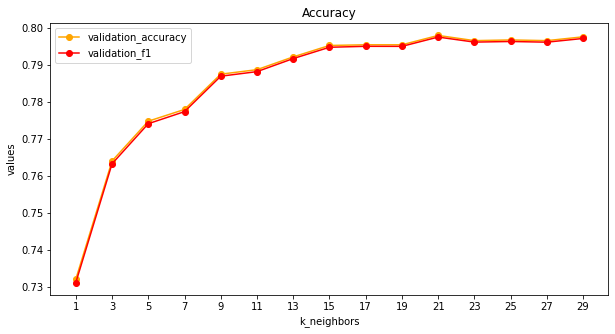

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
val_accuracy = []
val_f1 = []
k_neighbors = []
for k in range(1,30,2):
    model = KNeighborsClassifier(n_neighbors=k, weights='uniform', p = 1)
    kf = StratifiedKFold(n_splits=10, shuffle = True, random_state=1)
    val_accuracy.append(cross_val_score(model, X, y, scoring= 'accuracy', cv = kf).mean())
    val_f1.append(cross_val_score(model, X, y, scoring= 'f1_macro', cv = kf).mean())
    k_neighbors.append(k)

plt.subplots(figsize = (10,5))
plt.plot(k_neighbors, val_accuracy,'-ok', label = 'validation_accuracy', color = 'orange')
plt.plot(k_neighbors, val_f1,'-ok', label = 'validation_f1', color = 'red')
plt.title('Accuracy')
plt.xlabel("k_neighbors")
plt.ylabel("values")
plt.xticks(k_neighbors)
plt.legend()
plt.show()

In [ ]:
import pickle
model = KNeighborsClassifier(n_neighbors= 15, weights= 'uniform', p = 1)
model.fit(stratified_train, y_train)
filename = r'/content/drive/MyDrive/AI report/knn_model.sav'
pickle.dump(model, open(filename,'wb'))

In [ ]:
model_imb = KNeighborsClassifier(n_neighbors=15, weights='uniform', p = 1)
model_imb.fit(X_train_imb, y_train_imb)
pickle.dump(model_imb, open(r'/content/drive/MyDrive/AI report/knn_model_imb.sav', 'wb'))

**SVM Model**

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X, y)

SVC()

# Performance evaluation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
import pickle

In [ ]:
loaded_knn = pickle.load(open(r'/content/drive/MyDrive/AI report/knn_model.sav','rb'))

In [ ]:
import pandas as pd

test_set = pd.read_csv(r'/content/drive/MyDrive/AI report/test_set.csv', encoding='Latin-1')
X_test = test_set.drop(columns = 'y')
y_test = test_set.y

 **test for balanced dataset**

**1. KNN**

In [ ]:
y_pred = loaded_knn.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7944885567491826
Test F1 Score:  0.7806580259222332
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,918,215,1133
1,225,783,1008
All,1143,998,2141


**2. SVM Model**

In [ ]:

test = clf.predict(X_test)


In [ ]:
print("Test Accuracy: ",accuracy_score(y_test,test))
print("Test F1 Score: ",f1_score(y_test,test))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, test, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8295189163942083
Test F1 Score:  0.82392667631452
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,922,211,1133
1,154,854,1008
All,1076,1065,2141


**# test for imbalance dataset**

**1. KNN**

In [ ]:
test_imb = pd.read_csv(r'/content/drive/MyDrive/AI report/test_set_imb.csv', encoding= 'Latin-1')
X_test_imb = test_imb.drop(columns = 'y')
y_test_imb =test_imb.y

NameError: ignored

In [ ]:
loaded_knn_imb = pickle.load(open(r'/content/drive/MyDrive/AI report/knn_model_imb.sav','rb'))
y_pred_imb = loaded_knn_imb.predict(X_test_imb)
print("Test Accuracy: ",accuracy_score(y_test_imb,y_pred_imb))
print("Test F1 Score: ",f1_score(y_test_imb,y_pred_imb))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test_imb, y_pred_imb, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8859392575928009
Test F1 Score:  0.2511078286558346
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,7706,100,7806
1,914,170,1084
All,8620,270,8890


**2. SVM Model**

In [ ]:

test_imb = clf.predict(X_test_imb)


In [ ]:
print("Test Accuracy: ",accuracy_score(y_test_imb, test_imb))
print("Test F1 Score: ",f1_score(y_test_imb, test_imb))
print("Confusion Matrix on Test_imb Data")
pd.crosstab(y_test_imb, test_imb, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.6507311586051744
Test F1 Score:  0.39485480413174817
Confusion Matrix on Test_imb Data


Predicted,0,1,All
True,,,
0,4772,3034,7806
1,71,1013,1084
All,4843,4047,8890
